# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 1 - Perceptron

## Sztuczna komórka nerwowa
Za pierwszy model sieci neuronowej uważa sie zainspirowany modelem biologicznym, model neuronu zaproponowany przez W. McCullacha i W. Pittsa w 1943 roku. Był to prosty neuron zdefiniowany jako układ z pewnym progiem wrażliwości posiadającym dwa typy wejść: pobudzające i hamujące. Założono, że układ ten może przyjmować tylko dwa stany: aktywny bądź nieaktywny.
![neuron.png](http://torus.uck.pk.edu.pl/~amarsz/images/neuronl.png)

Model neuronu McCullacha-Pittsa przedstawiony na powyższym rysunku, można opisać zależnością
$$y = f\left(\sum\limits_{i=1}^N{w_ix_i}+w_0\right)$$
gdzie:

- funkcja $f(\cdot)$ jest funkcją aktywacji neuronu,
- wartości $x_i$ są sygnałami wejściowymi,
- współczynniki $w_i$ są wagami połączeń synaptycznych,
- współczynnik $w_0$ jest progiem wrażliwości neuronu (tzw. biasem).

W oryginalnym modelu McCullocha-Pittsa jako funkcji aktywacji użyto funkcji skokowej, a dokładniej pseudofunkcji Heaviside’a
$$ f(u) = \left\{\begin{array}{l}
1, \quad u \geq 0,\\
0, \quad u<0.\end{array}\right.$$

## Perceptron
Model neuronu McCullacha-Pittsa opisany powyżej z odpowiednio dobraną strategią uczenia nazywany jest _perceptronem Rosenblatta_ lub krótko _perceptronem_.

Niech wektory sygnałów wejściowych oraz wartości wag będą odpowiednio postaci $x = [1, x_1, x_2, \ldots, x_N]$ oraz
$w = [w_0, w_1, \ldots, w_N]$. Do wektora $x$ dołączono składową zerową $x_0 = 1$, stanowiącą sygnał polaryzacji, natomiast wartość wagi $w_0$ jest progiem wrażliwości neuronu (biasem). 

Wówczas model perceptronu możemy zapisać w postaci
$$y = f(u) = f\left(\sum\limits_{i=0}^N{w_ix_i}\right)$$

### Zastosowania prerceprtronu
Perceptron na wyjściu zgodnie z funkcją aktywacji może przyjmować tylko dwie wartości 0 lub 1, wobec tego może on zostać wykorzystany do klasyfikacji wzorców pochodzących z dwóch różnych klas. Jeśli wartość sumatora jest dodatnia to wzorzec zostanie zaklasyfikowany do klasy 1, w przeciwnym przypadku będzie to klasa 0.

Rozważmy problem w przestrzeni dwuwymiarowej ($N = 2$), wówczas perceptron odseparowuje klasy od siebie za pomocą linii prostej (w dowolnym wymiarze jest to ($N − 1$)-wymiarowa hiperpłaszczyzna) danej równaniem
$$w_0x_0+w_1x_1+w_2x_2=0,$$
co można zapisać w postaci równania kierunkowego prostej
$$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}.$$
Na poniższym rysunku przedstawiona jest interpretacja geometryczna działania perceptronu w przypadku dwuwymiarowym, widzimy, że wagi sygnałów wejściowych wyznaczają nachylenie prostej, natomiast bias odpowiedzialny jest za przesunięcie prostej.
![perc2d.png](http://torus.uck.pk.edu.pl/~amarsz/images/perc2d.png)

### Uczenie perceptronu
Uczenie perceptronu należy do grupy uczenia z nauczycielem i polega na takim doborze wektora wag $w$, aby sygnały wyjściowe neuronu $y$ były najbliżej wartości pożądanej $d$. Najpopularniejszą metodą uczenia perceptronu jest tzw. _reguła perceptronu_, którą można opisać w postaci kilku kroków.

Załóżmy, że dysponujemy zbiorem wektorów uczących postaci $\{x^{(0)}, x^{(1)}, \ldots, x^{(P)}\}$ oraz odpowiadającym mu zbiorem wartości pożądanych $\{d^{(0)}, d^{(1)},\ldots, d^{(P)}\}$.

#### Reguła perceptronu
1. Ustalamy $t = 0$.
2. Ustalamy w sposób losowy początkowe wartości wektora wag $w$.
3. Prezentujemy na wejścia perceptronu wektor uczący $x^{(t)}$.
4. Obliczamy odpowiedź perceptronu $y$ zgodnie z wzorem $y = f\left(\sum\limits_{i=0}^N{w_ix^{(t)}_i}\right)$
5. Porównujemy odpowiedź perceptronu $y$ z pożądaną odpowiedzią $d^{(t)}$.
6. Modyfikujemy wartości wag według poniższych reguł, parametr $\eta\in(0,1)$ to _współczynnuk uczenia_:
   - jeśli $y = d^{(t)}$ to wagi pozostają niezmienione,
   - jeśli $y = 0$, a $d^{(t)}=1$ to $w_i = w_i + \eta x_i^{(t)}$,
   - jeśli $y = 1$, a $d^{(t)}=0$ to $w_i = w_i - \eta x_i^{(t)}$.
7. Jeżeli warunek zatrzymania nie jest spełniony, to ustalamy $t = t + 1$ i wracamy do kroku 3, w przeciwnym przypadku kończymy algorytm.

Wykonanie powyższej procedury dla wszystkich wektorów uczących nazywamy _epoką uczenia_. W przypadku uczenia perceptronu wykonujemy tyle epok, aż wszystkie przykłady uczące będą dobrze sklasyfikowane lub błąd klasyfikacji będzie dostatecznie mały. Stabilność oraz szybkość uczenia tym algorytmem w istotny sposób zależy od doboru
parametru $\eta$. Współczynnik ten dobierany jest najczęściej w sposób empiryczny.

Przykładowy przebieg uczenia dla danych `2D.csv`:
![anim_perc.gif](http://torus.uck.pk.edu.pl/~amarsz/images/anim_perc.gif)

## Zadanie 1
Zaimplementuj model preceptronu w postaci klasy.

In [18]:
import numpy as np

class Perceptron:
    # Inicjalizator, ustawiający atrybut self.w jako wektor losowych wag, n ilość sygnałów wejściowych
    def __init__(self, n):
        self.w = np.random.normal(0, 0.1, n+1)
        self.n = n
        
    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[1,x1,x2,...,xN]
    def predict(self, x):
        predicted = self.w[0]
        for i in range(1, self.n +1):
            predicted += self.w[i]*x[i-1]
        if predicted < 0.0:
            return 0.0
        else:
            return 1.0
        
    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol):
        error = 100
        i = 0
        while error > tol:
            i += 1
            error = 0
            for i in range(len(d)):
                y = self.predict(xx[i])
                delta = d[i] -y
                error += abs(delta)
                for j in range(1, self.n+1):
                    self.w[j] += delta*eta*xx[i][j-1]
                self.w[0] += delta
            error /= len(d)
        return i, error
        
    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        error = 0
        for i in range(len(d)):
            y = self.predict(xx[i])
            delta = d[i] - y
            error += abs(delta)
        return error/len(d), y
    
    def linear(self):
        if -(self.w[1]/self.w[2])*(-1)-(self.w[0]/self.w[2]) < -1 or -(self.w[1]/self.w[2])*(-1)-(self.w[0]/self.w[2]) > 1:
            x_2_1 = -1
            x_1_1 = -(self.w[2]/self.w[1])*x_2_1-(self.w[0]/self.w[1])
        x_1_2 = 1
        x_2_2 = -(self.w[1]/self.w[2])*x_1_2-(self.w[0]/self.w[2])
        if x_2_2 < -1 or x_2_2 > 1:
            x_2_2 = 1
            x_1_2 = -(self.w[2]/self.w[1])*x_2_2-(self.w[0]/self.w[1])
        return ([x_1_1, x_1_2], [x_2_1, x_2_2])

## Zadanie 2
- Stwórz dwa obiekty klasy `Perceptron`. 
- Wczytaj dane z plików `2D.csv` oraz `3D.csv.`
- Pierwszy z perceptronów naucz klasyfikować dane z pliku `2D.csv`, ucz tylko na losowej części danych (np. 80%)
- Drugi z perceptronów naucz klasyfikować dane z pliku `3D.csv`, ucz tylko na losowej części danych (np. 80%)
- Oba zbiory danych są przykładami problemów liniowo separowalnych, a więc należy uczyć modele tak aby uzyskiwać dla danych uczących błąd równy zero.
- Przedstaw rezultaty uczenia na wykresach, odpowiednio 2D lub 3D. Na wykresach powinny znaleźć się dane testowe, tzn. te które nie były wykorzystywane w trakcie uczenia oraz linia (płaszczyzna) rozdzielająca klasy.

(0.0, 1.0)


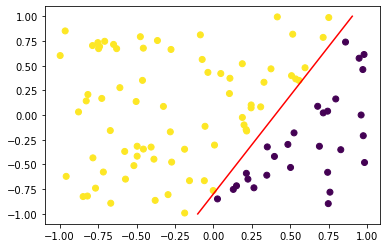

In [25]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

set2D = np.array(pd.read_csv('2D.csv', decimal = ',', delimiter = ';'))
np.random.shuffle(set2D)
x2D = set2D[:,:2]
d2D = set2D[:,2]

point = int(0.8*len(d2D))
x2d_IQ = x2D[:point]
x2d_check = x2D[point:]
d2d_IQ = d2D[:point]
d2d_check = d2D[point:]

perc2D = Perceptron(2)

L, E = perc2D.train(x2d_IQ, d2d_IQ, 0.05, 0.0)

print(perc2D.evaluate_test(x2d_check, d2d_check))
xx, yy = perc2D.linear()

plt.scatter(x2d_check[:,0], x2d_check[:,1], c=d2d_check)
plt.plot(xx,yy,'r')
plt.show()

&copy; Katedra Informatyki, Politechnika Krakowska